First we do the import of the needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('car_data.csv', sep = ',', index_col= 'id', na_values='#N/D')

In [3]:
df

,Model,Year,Status,Mileage,Price,MSRP
id,,,,,,
0,2022 Acura TLX A-Spec,2022,New,Not available,"$49,445","MSRP $49,445"
1,2023 Acura RDX A-Spec,2023,New,Not available,"$50,895",Not specified
2,2023 Acura TLX Type S,2023,New,Not available,"$57,745",Not specified
3,2023 Acura TLX Type S,2023,New,Not available,"$57,545",Not specified
4,2019 Acura MDX Sport Hybrid 3.0L w/Technology ...,2019,Used,"32,675 mi.","$40,990",$600 price drop
...,...,...,...,...,...,...
10005,2023 Volkswagen Atlas 3.6L SE w/Technology,2023,New,Not available,"$47,346",Not specified
10006,2023 Volkswagen Taos 1.5T SE,2023,New,Not available,"$30,895",Not specified
10007,2012 Volkswagen Beetle,2012,Used,"100,395 mi.","$9,994",$252 price drop


In [4]:
df.isna().sum().sort_values(ascending = False)

Model      0
Year       0
Status     0
Mileage    0
Price      0
MSRP       0
dtype: int64

We now check the amount of unique variables in our dataset

In [5]:
df.nunique(axis=0)

Model       9216
Year          70
Status        11
Mileage    49282
Price      37652
MSRP       12977
dtype: int64

Since our data is too big to process accordingly, we'll take a sample of 1000 rows

In [6]:
df_sample = df.iloc[:100]

In [7]:
df_sample

,Model,Year,Status,Mileage,Price,MSRP
id,,,,,,
0,2022 Acura TLX A-Spec,2022,New,Not available,"$49,445","MSRP $49,445"
1,2023 Acura RDX A-Spec,2023,New,Not available,"$50,895",Not specified
2,2023 Acura TLX Type S,2023,New,Not available,"$57,745",Not specified
3,2023 Acura TLX Type S,2023,New,Not available,"$57,545",Not specified
4,2019 Acura MDX Sport Hybrid 3.0L w/Technology ...,2019,Used,"32,675 mi.","$40,990",$600 price drop
...,...,...,...,...,...,...
95,2023 Acura Integra A-Spec Technology,2023,New,Not available,"$37,395","MSRP $37,395"
96,2023 Acura Integra w/A-Spec Tech Package,2023,New,Not available,"$38,095",Not specified
97,2023 Acura TLX Technology,2023,New,Not available,"$45,245","MSRP $45,245"


In [8]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Model    100 non-null    object
 1   Year     100 non-null    int64 
 2   Status   100 non-null    object
 3   Mileage  100 non-null    object
 4   Price    100 non-null    object
 5   MSRP     100 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.5+ KB


We check if the current dataset has any missing values

In [9]:
df_sample.isna().sum().sort_values(ascending = False)

Model      0
Year       0
Status     0
Mileage    0
Price      0
MSRP       0
dtype: int64

In [10]:
def Categorical_Variables(cat):
    
    #Rows
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Graph
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #One Dimentional Graph
    ax = ax.flat 

    #Variable Cycle
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

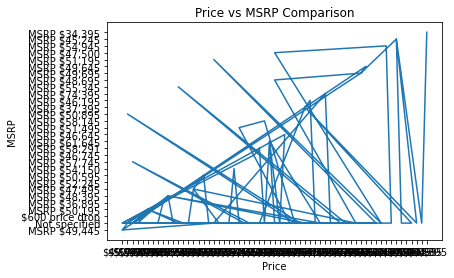

In [11]:
Price = df_sample["Price"]
MSRP = df_sample["MSRP"]

plt.plot(Price, MSRP)
plt.xlabel('Price')
plt.ylabel('MSRP')
plt.title('Price vs MSRP Comparison')

plt.show()